In [1]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential

%matplotlib inline

In [2]:
data_dir = '../input/gtsrb-german-traffic-sign'
train_path = '../input/gtsrb-german-traffic-sign/Train'
test_path = '../input/gtsrb-german-traffic-sign/'
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [3]:
# Number of Classes
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

In [7]:
ls = os.listdir('../input/gtsrb-german-traffic-sign/train/')
ls

['7',
 '17',
 '19',
 '22',
 '2',
 '35',
 '23',
 '10',
 '5',
 '36',
 '20',
 '27',
 '41',
 '39',
 '32',
 '25',
 '42',
 '8',
 '38',
 '12',
 '0',
 '31',
 '34',
 '18',
 '28',
 '16',
 '13',
 '26',
 '15',
 '3',
 '1',
 '30',
 '14',
 '4',
 '9',
 '21',
 '40',
 '6',
 '11',
 '37',
 '33',
 '29',
 '24']

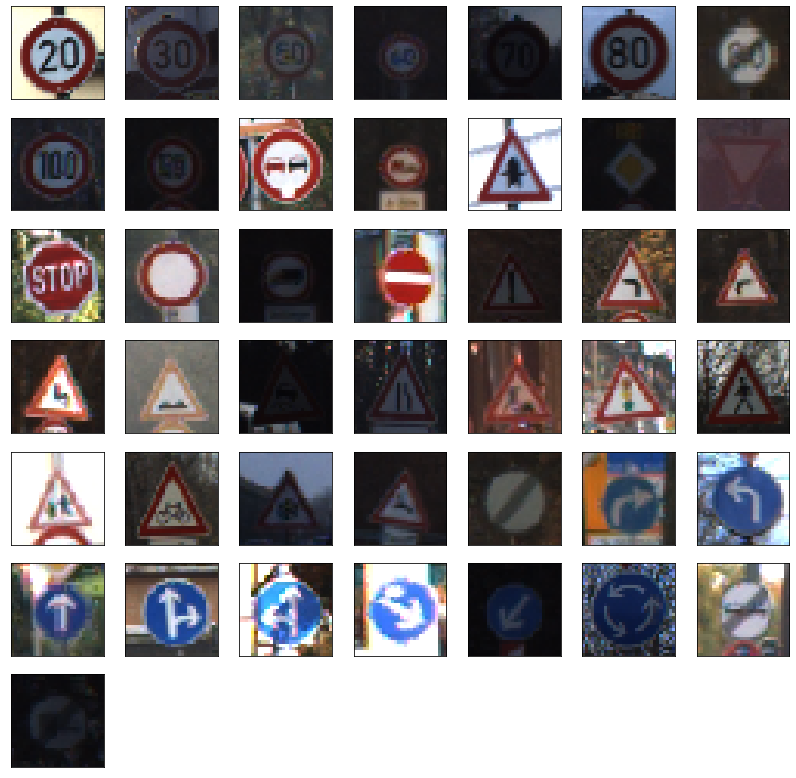

In [8]:
# Visualizing all the different Signs
img_dir = pathlib.Path(train_path)
plt.figure(figsize=(14,14))
index = 0
for i in range(NUM_CATEGORIES):
    plt.subplot(7, 7, i+1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    sign = list(img_dir.glob(f'{i}/*'))[0]
    img = load_img(sign, target_size=(IMG_WIDTH, IMG_HEIGHT))
    plt.imshow(img)
plt.show()
    


In [9]:
def load_data(data_dir):
    '''
    Loading data from Train folder.
    
    Returns a tuple `(images, labels)` , where `images` is a list of all the images in the train directory,
    where each image is formatted as a numpy ndarray with dimensions IMG_WIDTH x IMG_HEIGHT x 3. 
    `labels` is a list of integer labels, representing the categories for each of the
    corresponding `images`.
    '''
    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)
    
    return images, labels
        

In [10]:
images, label = load_data(train_path)

# One hot encoding the labels
labels = to_categorical(label)

# Splitting the dataset into training and test set
x_train, x_test, y_train, y_test = train_test_split(np.array(images), labels, test_size=0.4)

In [16]:
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [11]:
model = Sequential()

# First Convolutional Layer
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Second Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))

# Third Convolutional Layer
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [17]:
# Flattening the layer and adding Dense Layer
model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dense(NUM_CATEGORIES, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [18]:
# Compiling the model
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [19]:
# Fitting the model
EPOCHS = 30
history = model.fit(x_train, 
                    y_train,
                    validation_data = (x_test, y_test), 
                    epochs=EPOCHS, 
                    steps_per_epoch=60
                   )

Epoch 1/30
60/60 [==============================] - 2s 32ms/step - loss: 9.0702 - accuracy: 0.0478 - val_loss: 3.6504 - val_accuracy: 0.0886
Epoch 2/30
60/60 [==============================] - 1s 25ms/step - loss: 3.3840 - accuracy: 0.1498 - val_loss: 2.9208 - val_accuracy: 0.2981
Epoch 3/30
60/60 [==============================] - 2s 25ms/step - loss: 2.6349 - accuracy: 0.3186 - val_loss: 2.1991 - val_accuracy: 0.4502
Epoch 4/30
60/60 [==============================] - 2s 28ms/step - loss: 1.9953 - accuracy: 0.4471 - val_loss: 1.6289 - val_accuracy: 0.5640
Epoch 5/30
60/60 [==============================] - 2s 25ms/step - loss: 1.4973 - accuracy: 0.5650 - val_loss: 1.1046 - val_accuracy: 0.6961
Epoch 6/30
60/60 [==============================] - 1s 25ms/step - loss: 1.1284 - accuracy: 0.6678 - val_loss: 0.8002 - val_accuracy: 0.7937
Epoch 7/30
60/60 [==============================] - 1s 25ms/step - loss: 0.8768 - accuracy: 0.7410 - val_loss: 0.6144 - val_accuracy: 0.8448
Epoch 8/30
60

In [20]:
loss, accuracy = model.evaluate(x_test, y_test)

print('test set accuracy: ', accuracy * 100)

491/491 [==============================] - 1s 2ms/step - loss: 0.0970 - accuracy: 0.9779
test set accuracy:  97.79393076896667


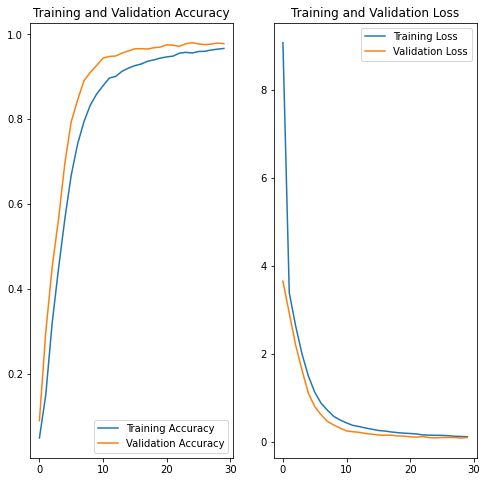

In [21]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [22]:
from sklearn.metrics import accuracy_score
import pandas as pd

Y_test = pd.read_csv(test_path + 'Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict_classes(X_test)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

Test Data accuracy:  92.09817893903404


16 Double curve  ==  Double curve
1 Speed limit (30km/h)  ==  Speed limit (30km/h)
38 No entry  ==  No entry
33 Keep left  ==  Keep left
11 Vechiles over 3.5 metric tons prohibited  ==  Vechiles over 3.5 metric tons prohibited
38 No entry  ==  No entry
18 Slippery road  ==  Slippery road
12 Right-of-way at the next intersection  ==  Right-of-way at the next intersection
25 Beware of ice/snow  ==  Beware of ice/snow
35 Priority road  ==  Priority road
12 Right-of-way at the next intersection  ==  Right-of-way at the next intersection
7 Speed limit (120km/h)  ==  Speed limit (120km/h)
23 Children crossing  ==  Children crossing
7 Speed limit (120km/h)  ==  No passing
4 Speed limit (70km/h)  ==  Speed limit (70km/h)
9 No passing for vechiles over 3.5 metric tons  ==  No passing for vechiles over 3.5 metric tons
21 Traffic signals  ==  Traffic signals
20 Road work  ==  Road work
27 Turn right ahead  ==  Turn right ahead
38 No entry  ==  No entry
4 Speed limit (70km/h)  ==  Speed limit (70k

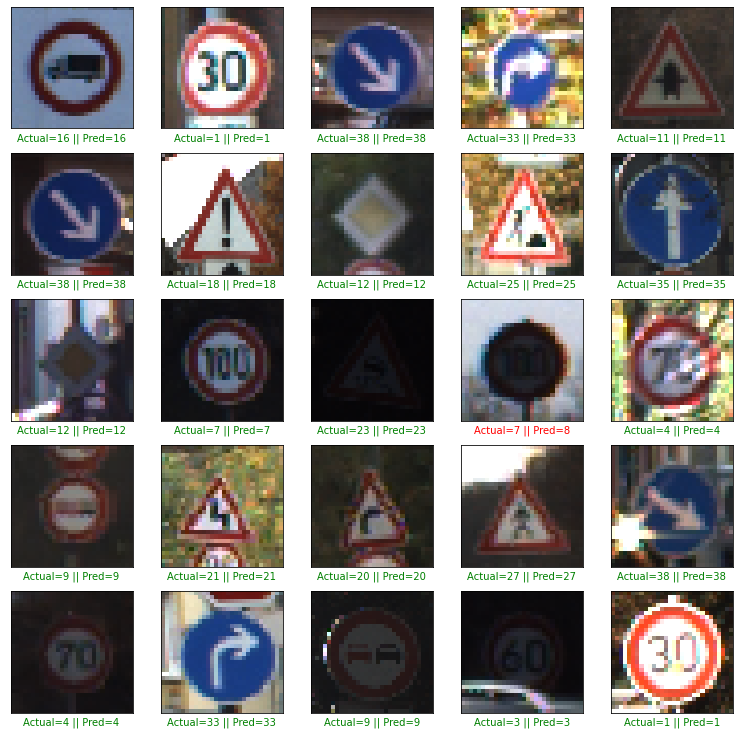

In [28]:
plt.figure(figsize = (13, 13))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
    print(actual, classes[actual], " == ", classes[prediction])
plt.show()

In [24]:
model.save('traffic_signal.h5')

In [26]:
classes = [
    'Speed limit (20km/h)',
    'Speed limit (30km/h)',
    'Speed limit (50km/h)',
    'Speed limit (60km/h)',
    'Speed limit (70km/h)',
    'Speed limit (80km/h)',
    'Speed limit (100km/h)',
    'Speed limit (120km/h)',
    'No passing',
    'No passing for vechiles over 3.5 metric tons',
    'No vehicles',
    'Vechiles over 3.5 metric tons prohibited',
    'Right-of-way at the next intersection',
    'General caution',
    'Dangerous curve to the left',
    'Dangerous curve to the right',
    'Double curve',
    'Bumpy road',
    'Slippery road',
    'Road narrows on the right',
    'Road work',
    'Traffic signals',
    'Pedestrians',
    'Children crossing',
    'Bicycles crossing',
    'Beware of ice/snow',
    'Wild animals crossing',
    'Turn right ahead',
    'Turn left ahead',
    'Ahead only',
    'Go straight or right',
    'Go straight or left',
    'Keep right',
    'Keep left',
    'Roundabout mandatory',
    'Priority road',
    'Yield',
    'Stop',
    'No entry',
    'End of speed limit (80km/h)',
    'End of all speed and passing limits',
    'End of no passing',
    'End of no passing by vechiles over 3.5 metric tons'
]

In [29]:
dff = pd.DataFrame(classes)
dff.to_csv('traffic_signal_class_names.csv', header=False, index=False)